In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student_performance_dataset.csv to student_performance_dataset.csv


In [ ]:
# Step 2: Load dataset
import pandas as pd

df = pd.read_csv("student_performance_dataset.csv")
print(df.head())


   Attendance  Internal_Score  Study_Hours Performance
0          85              78            6        Good
1          60              50            2     At Risk
2          90              92            8   Excellent
3          75              70            5        Good
4          55              40            1     At Risk


In [ ]:
# Step 3: Encode performance labels
le = LabelEncoder()
df['Performance_encoded'] = le.fit_transform(df['Performance'])

In [ ]:
# Step 4: Train-test split
X = df[['Attendance', 'Internal_Score', 'Study_Hours']]
y = df['Performance_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 5: Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Step 6: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


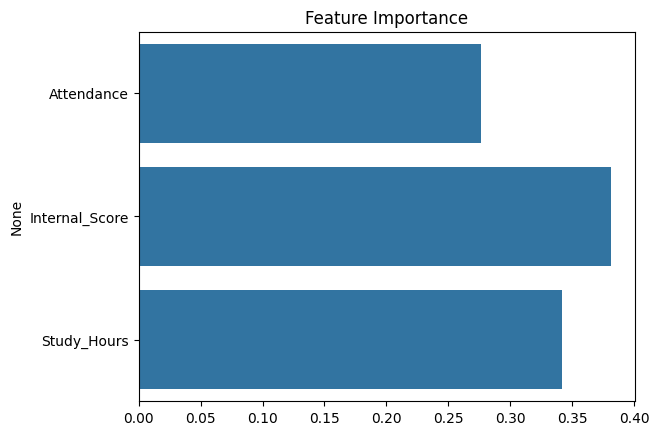

In [ ]:

# Step 7: Feature importance
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

In [ ]:
# Step 8: Prediction function
def predict_performance(attendance, internal_score, study_hours):
    input_df = pd.DataFrame([[attendance, internal_score, study_hours]],
                            columns=X.columns)
    pred = model.predict(input_df)[0]
    return le.inverse_transform([pred])[0]



In [ ]:
# Example prediction
print("Predicted Performance:", predict_performance(85, 70, 5))

Predicted Performance: Good
